In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

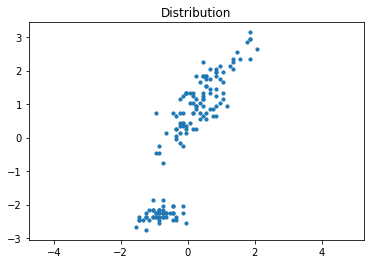

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df = pd.read_csv('/iris.csv', sep=',')

x = np.array(df.loc[:, ["sepal.length", "petal.length"]])

x = x - np.mean(x, 0)
n_features = x.shape[1]
plt.scatter(x = x.T[0], y = x.T[1], s = 10)
plt.title('Distribution')
plt.axis('equal');


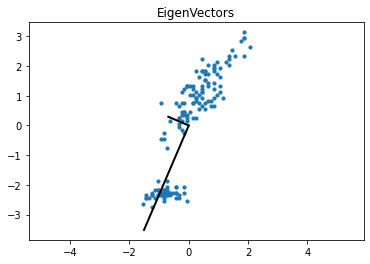

In [ ]:

cov = np.cov(x.T)
eValues, eVectors = np.linalg.eig(cov)

plt.scatter(x = x.T[0], y = x.T[1], s = 10)

for eValue, eVector in zip(eValues, eVectors.T):
    plt.plot([x.T[0].mean(), x.T[0].mean()+2*np.sqrt(eValue)*eVector[0]],
             [x.T[1].mean(), x.T[1].mean()+2*np.sqrt(eValue)*eVector[1]], 'k-', lw=2)
    
plt.title('EigenVectors')
plt.axis('equal');

In [ ]:
# covariance matrix를 항등행렬로 변환 
Rot = np.linalg.inv(eVectors)
Scale = np.linalg.inv(np.sqrt(np.diag(eValues)))
T = np.matmul(Scale, Rot)

tx = np.matmul(T, x.T).T
np.cov(tx.T)

array([[1.00000000e+00, 1.61806553e-15],
       [1.61806553e-15, 1.00000000e+00]])

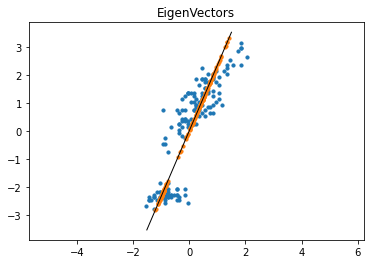

In [ ]:
#PCA

n_components = 1
eValues, eVectors = np.linalg.eig(cov)

for n in range(n_components):
    for i in range(n_features-1, n, -1):
        if(eValues[i-1] < eValues[i]):
            tmp = eValues[i]
            eValues[i] = eValues[i-1]
            eValues[i-1] = tmp

            tmp2 = np.vstack((eVectors.T[:i-1], eVectors.T[i]))
            tmp3 = np.vstack((eVectors.T[i-1], eVectors.T[i+1:]))            
            eVectors = np.vstack((tmp2, tmp3)).T
            
            
fit = eVectors.T[:n_components].T
fit_x = np.matmul(fit.T, x.T).T
g_x = np.matmul(fit_x, fit.T)

plt.scatter(x = x.T[0], y = x.T[1], s = 10)
    
for n in range(n_components):
    plt.plot([x.T[0].mean()-2*np.sqrt(eValues[n])*eVectors.T[n][0], x.T[0].mean()+2*np.sqrt(eValues[n])*eVectors.T[n][0]],
             [x.T[1].mean()-2*np.sqrt(eValues[n])*eVectors.T[n][1], x.T[1].mean()+2*np.sqrt(eValues[n])*eVectors.T[n][1]], 'k', lw=1)

plt.scatter(x = g_x.T[0], y =g_x.T[1], s = 10)
    
plt.title('EigenVectors')
plt.axis('equal');

In [ ]:
fit_x

array([[ 2.46024094],
       [ 2.53896211],
       [ 2.70961121],
       [ 2.56511594],
       [ 2.49960153],
       [ 2.0663754 ],
       [ 2.65704387],
       [ 2.4076736 ],
       [ 2.73576504],
       [ 2.44703418],
       [ 2.25023126],
       [ 2.39446684],
       [ 2.5783227 ],
       [ 3.05090941],
       [ 2.36857271],
       [ 2.1321495 ],
       [ 2.43408712],
       [ 2.46024094],
       [ 1.94829364],
       [ 2.36831301],
       [ 2.0663754 ],
       [ 2.36831301],
       [ 3.02475559],
       [ 2.18445715],
       [ 2.11868305],
       [ 2.31574567],
       [ 2.31574567],
       [ 2.32895243],
       [ 2.42088036],
       [ 2.43382742],
       [ 2.39446684],
       [ 2.25023126],
       [ 2.32895243],
       [ 2.3027986 ],
       [ 2.44703418],
       [ 2.68345739],
       [ 2.39472653],
       [ 2.53896211],
       [ 2.82769297],
       [ 2.36831301],
       [ 2.59152946],
       [ 2.78833238],
       [ 2.82769297],
       [ 2.31574567],
       [ 2.00060129],
       [ 2